# Training Materials: Downloading, Extracting, and Displaying ALOS-2 Data

## Module 1: Introduction to ALOS-2 Data

### 1.1 Overview of ALOS-2

* ALOS-2 mission objectives and applications ([EO Portal](https://www.eoportal.org/satellite-missions/alos-2))
* PALSAR-2 sensor characteristics: L-band SAR, HH/HV polarization ([EO Portal](https://www.eoportal.org/satellite-missions/alos-2))
* CIRC sensor (brief mention) ([EO Portal](https://www.eoportal.org/satellite-missions/alos-2))
* Advantages of L-band SAR for forest and plantation monitoring ([ResearchGate](https://www.researchgate.net/publication/224183347_Generating_Large-Scale_High-Quality_SAR_Mosaic_Datasets_Application_to_PALSAR_Data_for_Global_Monitoring))

### 1.2 Data Access

* JAXA Earth Observation Research Center (EORC)
* Alaska Satellite Facility (ASF DAAC)
* Data formats and levels (Level 1.1, etc.)

## Module 2: Downloading and Extracting ALOS-2 Data

### 2.1 Data Downloading and Extraction

In [1]:
!curl --output "Shimpomachi_ngo.zip" "https://owncloud.glodal-inc.net/owncloud/index.php/s/7LpA8rRJjIUFabL/download"

import shutil, os
shutil.unpack_archive("Shimpomachi_ngo.zip", ".")
os.chdir('Shimpomachi_ngo')
os.listdir()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30.7M  100 30.7M    0     0  13.1M      0  0:00:02  0:00:02 --:--:-- 13.1M


['HH-191127.tif',
 'HH-200304.tif',
 'HH-200610.tif',
 'HH-210303.tif',
 'HH-210609.tif',
 'HH-211124.tif',
 'HH-220302.tif']

## Module 3: Displaying ALOS-2 Data with Python (9.1.2)

### 3.2 Introduction to Rasterio and Matplotlib

In [2]:
!pip install rasterio matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


* Importing libraries in Python scripts

### 3.3 Loading ALOS-2 Data

In [3]:
import os

# Find all GeoTIFF files in the folder
alos_files = [f for f in os.listdir() if f.endswith('.tif')]

if not alos_files:
    raise FileNotFoundError("No GeoTIFF files found in the specified directory.")
    
# Display list of files found
print("ALOS-2 files to visualize:")
for file in alos_files:
    print(file)


ALOS-2 files to visualize:
HH-191127.tif
HH-200304.tif
HH-200610.tif
HH-210303.tif
HH-210609.tif
HH-211124.tif
HH-220302.tif


### 3.4 Visualizing ALOS-2 Data

* Basic image display with Matplotlib (`plt.imshow()`)
* Using colormaps (`cmap='gray'`)
* Adding titles, colorbars, and other plot elements
* Displaying multiple images (subplots)

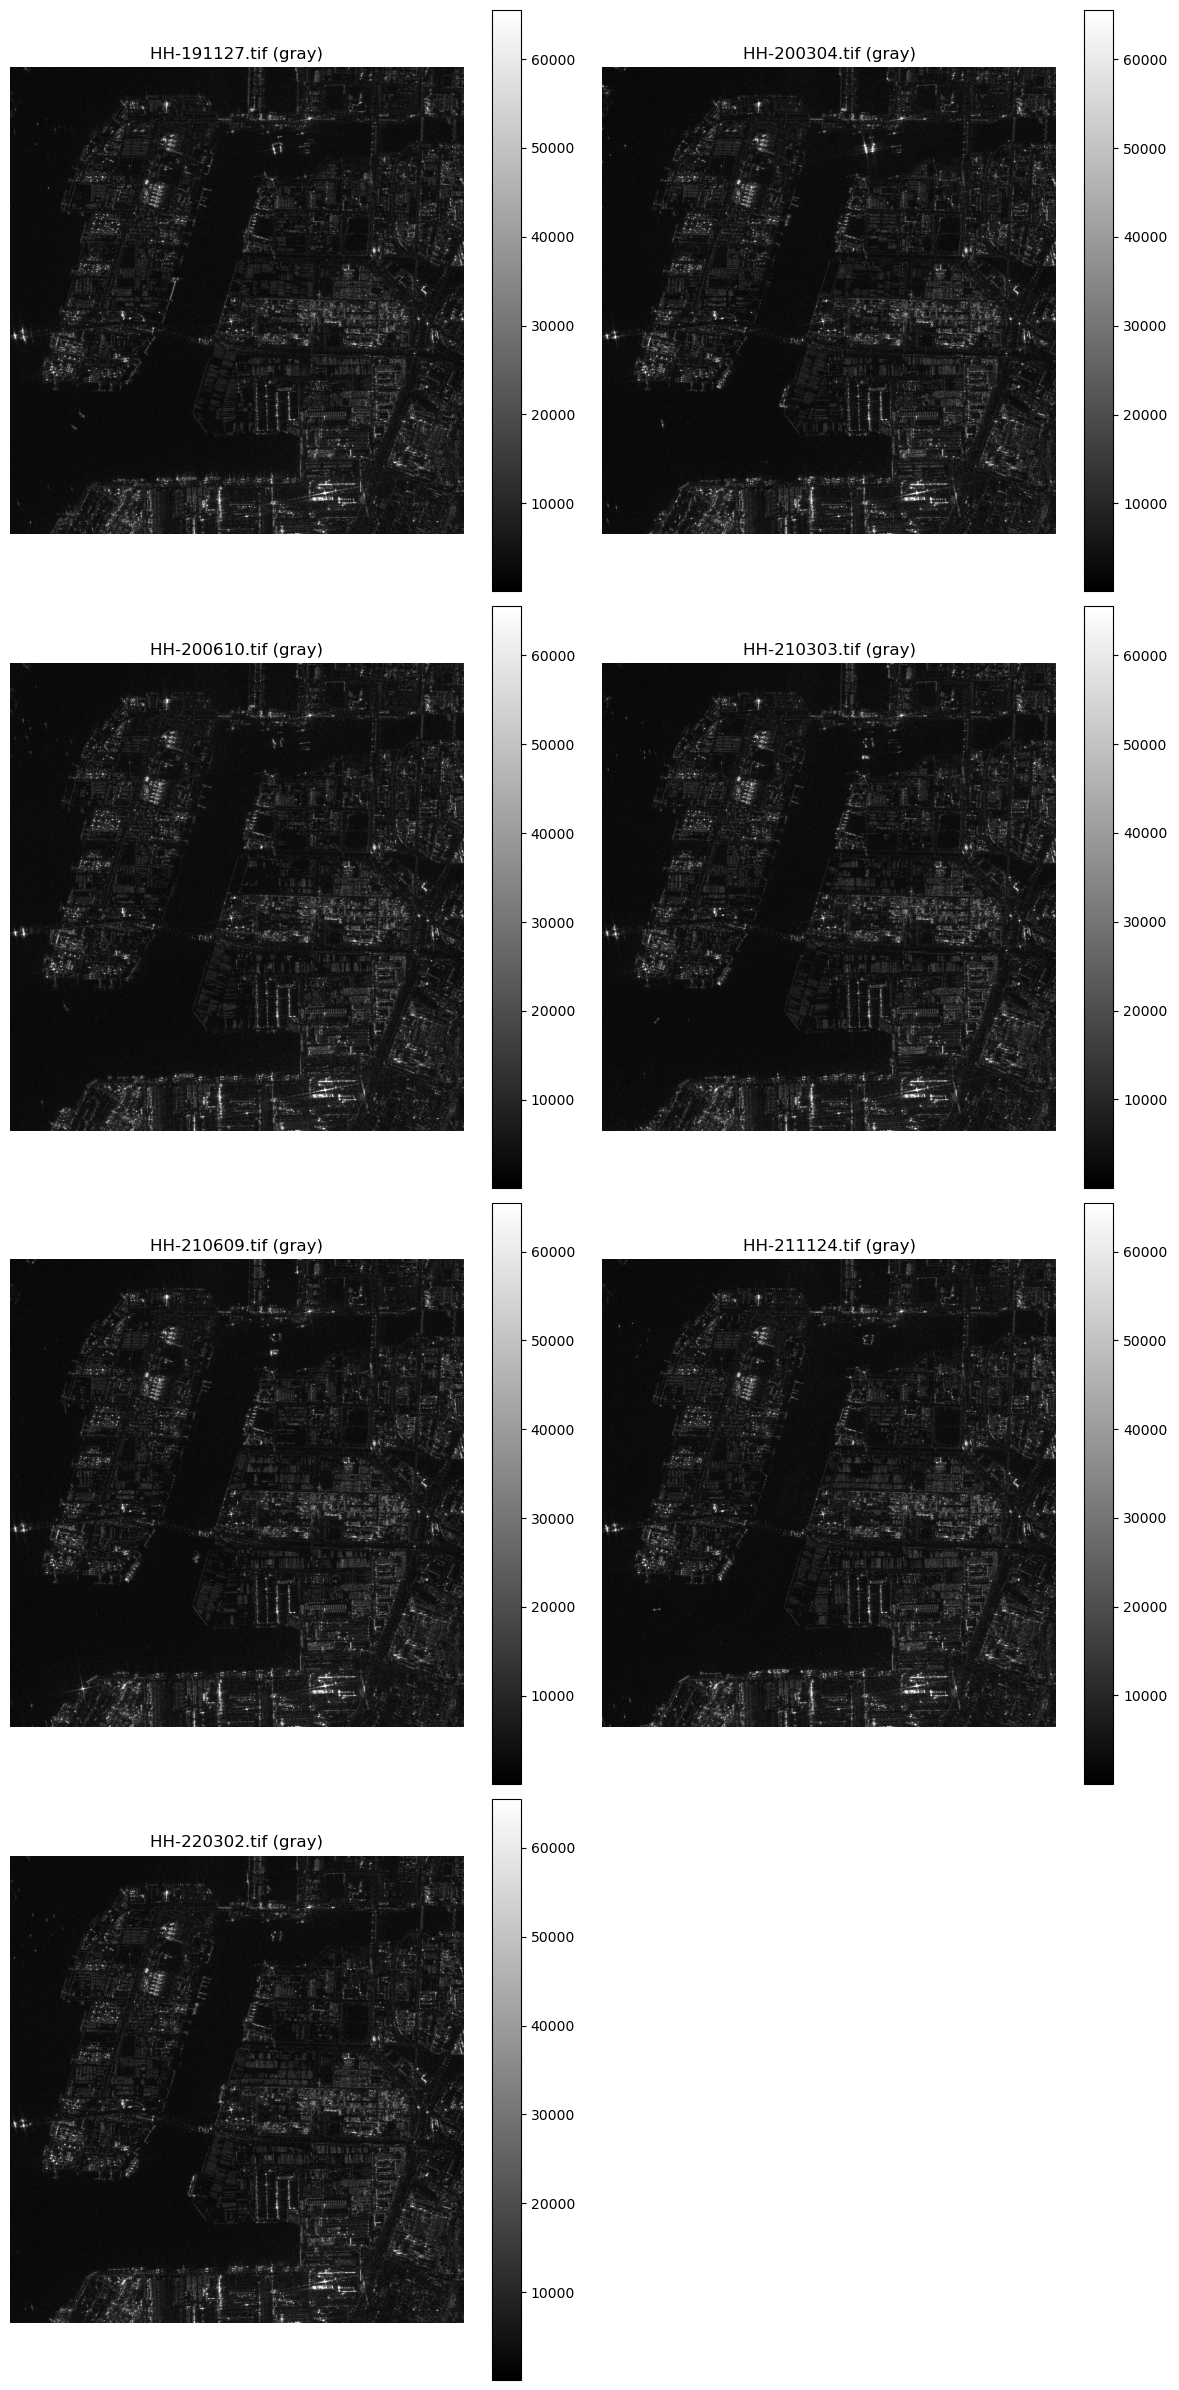

In [4]:
import rasterio
import matplotlib.pyplot as plt
import os

# Choose a color map
color_map = 'gray'  # Options: 'gray', 'viridis', 'plasma', 'inferno', 'jet', 'cividis', etc.

# Define the number of columns for the grid
n_cols = 2
n_rows = (len(alos_files) + n_cols - 1) // n_cols  # Calculate required rows based on the number of files

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 6))
axes = axes.flatten()  # Flatten to make it easy to iterate over

alos_image = list()
# Loop over each file and visualize the image with the selected color map
for idx, alos_path in enumerate(alos_files):
    with rasterio.open(alos_path) as src:
        alos_image.append(src.read(1))  # Read the first band (Assuming single-band data)

    # Plot the image in the respective subplot
    ax = axes[idx]
    img = ax.imshow(alos_image[idx], cmap=color_map)
    ax.set_title(f"{os.path.basename(alos_path)} ({color_map})")
    fig.colorbar(img, ax=ax)
    ax.axis('off')

# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
